# Анализ тарифов оператора сотовой связи (Tariff analysis)

## Описание проекта

Клиентам компании «Мегалайн» - федерального оператора сотовой связи - предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, необходимо понять, какой тариф приносит больше денег.
В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
    
**Цель работы:** проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Задачи проекта:** для достижения поставленной цели необходимо посчитать выручку с каждого пользователя по их тарифу и сравнить, какой тариф приносит большую прибыль.
  
**План работы:**:

* Изучить общую информацию о данных;
* Подготовить и обработать данные;
* Проанализировать данные, посчитать характерные параметры, построить гистограммы;
* Проверить гипотезы;
* Сделать выводы.

**Описание тарифов:**

Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

## Изучение общей информации

### Общая информация о данных

Импортируем библиотеки, необходимые для анализа данных

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Данные для исследования хранятся в 5 файлах. Откроем файлы формата `.csv` с помощью библиотеки `pandas`. Получим общую информацию о таблице. Выведим первые 10 строк таблицы.

In [2]:
calls = pd.read_csv('calls.csv', parse_dates = ['call_date'])
calls.info()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
internet = pd.read_csv('internet.csv', parse_dates = ['session_date'], index_col=0) 
internet.info()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [4]:
messages = pd.read_csv('messages.csv', parse_dates = ['message_date'])
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [5]:
tariffs = pd.read_csv('tariffs.csv') 
tariffs.info()
tariffs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
users = pd.read_csv('users.csv', parse_dates = ['reg_date', 'churn_date']) 
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


Проверим уникальность ключей `user_id` в таблицах

In [7]:
print(users['user_id'].value_counts())
print(messages['user_id'].value_counts())
print(internet['user_id'].value_counts())
calls['user_id'].value_counts()

1000    1
1329    1
1342    1
1341    1
1340    1
       ..
1161    1
1160    1
1159    1
1158    1
1499    1
Name: user_id, Length: 500, dtype: int64
1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64
1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64


1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

Типы данных в столбцах разные — `object`, `int`, `float`. В таблицах `users`, `calls`, `messages`, `internet` есть столбец с датой, которая записана как `object`. Чтобы сразу поменять на более удобный формат `datetime`, зададим параметр `parse_dates` при отркытии файлов.

Согласно документации к данным:

Таблица `users` (информация о пользователях):

* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

Таблица `calls` (информация о звонках):

* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):

* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):

* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):

* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод

В таблицах были обнаружены следующие данные: информация о пользователях, информация о звонках, информация о сообщениях, информация об интернет-сессиях, информация о тарифах. В данных пропуски встречаются в таблице `users` (информация о пользователях) в столбце `churn_date`, их оставим без изменения исходя из данных документации (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). 

Возможные аномалии устраним на следующем шаге.

## Предобработка и подготовка данных

### Предобработка данных в таблице `users`

Проверим данные в таблице `users`. Создадим функцию `describe_cols`, которая выведит список уникальных значений и их количество в каждом столбце и применим для таблицы `users`.

In [8]:
# функция для вывода списка и количества уникальных значений в таблице
def describe_cols(df):
    values = pd.DataFrame()
    for col in df.columns:
        values[col] = [df[col].unique(),df[col].nunique()]
    return values.transpose().sort_values(by = 1, ascending = True).rename({0: 'Значения', 1: 'Количество уникальных значений'}, axis = 1)
describe_cols(users) # применение функции для таблицы users

,Значения,Количество уникальных значений
tariff,"[ultra, smart]",2
churn_date,"[NaT, 2018-10-05T00:00:00.000000000, 2018-12-1...",33
age,"[52, 41, 59, 23, 68, 67, 21, 65, 63, 24, 26, 4...",58
city,"[Краснодар, Москва, Стерлитамак, Новокузнецк, ...",76
first_name,"[Рафаил, Иван, Евгений, Белла, Татьяна, Афанас...",246
reg_date,"[2018-05-25T00:00:00.000000000, 2018-11-01T00:...",270
last_name,"[Верещагин, Ежов, Абрамович, Белякова, Авдеенк...",419
user_id,"[1000, 1001, 1002, 1003, 1004, 1005, 1006, 100...",500


Выведим список характерных значений для каждого столбца.

In [9]:
users.describe() # список характерных значений

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Проверим наличие явных дубликатов в данных.

In [10]:
calls.duplicated().sum() # всего явных дубликатов

0

Явных дубликатов в данных нет.

### Предобработка данных в таблице `calls`

Проверим данные в таблице `calls`. Применим функцию `describe_cols` для таблицы `calls`.

In [11]:
describe_cols(calls) # применение функции

,Значения,Количество уникальных значений
call_date,"[2018-07-25T00:00:00.000000000, 2018-08-17T00:...",365
user_id,"[1000, 1001, 1002, 1003, 1004, 1005, 1006, 100...",492
duration,"[0.0, 2.85, 13.8, 5.18, 18.31, 18.44, 5.03, 18...",2871
id,"[1000_0, 1000_1, 1000_2, 1000_3, 1000_4, 1000_...",202607


Выведим список уникальных значений в столбце `duration`.

In [12]:
calls['duration'].value_counts() # количество уникальных значений в столбце 

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: duration, Length: 2871, dtype: int64

В столбце `duration` есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Выведим список характерных значений для каждого столбца.

In [13]:
calls.describe() # список характерных значений

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Проверим наличие явных дубликатов в данных.

In [14]:
calls.duplicated().sum() # всего явных дубликатов

0

Явных дубликатов в данных нет.

### Предобработка данных в таблице `messages`

Проверим данные в таблице `messages`. Применим функцию `describe_cols` для таблицы `messages`.

In [15]:
describe_cols(messages) # применение функции

,Значения,Количество уникальных значений
message_date,"[2018-06-27T00:00:00.000000000, 2018-10-08T00:...",364
user_id,"[1000, 1002, 1003, 1004, 1005, 1007, 1008, 100...",426
id,"[1000_0, 1000_1, 1000_2, 1000_3, 1000_4, 1000_...",123036


Проверим наличие явных дубликатов в данных.

In [16]:
messages.duplicated().sum() # всего явных дубликатов

0

Явных дубликатов в данных нет.

### Предобработка данных в таблице `internet`

Проверим данные в таблице `internet`. Применим функцию `describe_cols` для таблицы `internet`.

In [17]:
describe_cols(internet) # применение функции

,Значения,Количество уникальных значений
session_date,"[2018-11-25T00:00:00.000000000, 2018-09-07T00:...",365
user_id,"[1000, 1001, 1002, 1003, 1004, 1005, 1006, 100...",497
mb_used,"[112.95, 1052.81, 1197.26, 550.27, 302.56, 399...",70003
id,"[1000_0, 1000_1, 1000_2, 1000_3, 1000_4, 1000_...",149396


Выведим список характерных значений для каждого столбца.

In [18]:
internet.describe() # список характерных значений

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Проверим наличие явных дубликатов в данных.

In [19]:
internet.duplicated().sum() # всего явных дубликатов

0

Посмотрим на гистограмму распределения объема интернет-сессий, нет ли здесь аномалий, а также выведим список уникальных значений

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
643.43        1
973.04        1
834.51        1
777.30        1
23.72         1
Name: mb_used, Length: 70003, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


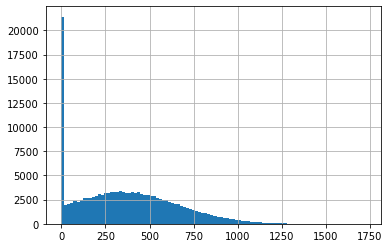

In [20]:
print(internet['mb_used'].value_counts())
internet['mb_used'].hist(bins=100)
internet.info()

Много нулевых значений трафика, он не несут никакой важной информации для нашего исследования. Удалим строки, где `mb_used` равно 0.

+ посмотреть на гистограмму распределения объема интернет-сессий, нет ли здесь аномалий

In [21]:
internet = internet.drop(np.where(internet['mb_used'] == 0)[0]) # удаление строк по условию
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  float64       
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.0+ MB


Явных дубликатов в данных нет.

В таблице есть столбец `'Unnamed: 0`. Он не несет в себе никакой информации. Удалим его.

### Предобработка данных в таблице `tariffs`

Проверим данные в таблице `tariffs`. Применим функцию `describe_cols` для таблицы `tariffs`.

In [22]:
describe_cols(tariffs) # применение функции

,Значения,Количество уникальных значений
messages_included,"[50, 1000]",2
mb_per_month_included,"[15360, 30720]",2
minutes_included,"[500, 3000]",2
rub_monthly_fee,"[550, 1950]",2
rub_per_gb,"[200, 150]",2
rub_per_message,"[3, 1]",2
rub_per_minute,"[3, 1]",2
tariff_name,"[smart, ultra]",2


В таблице 2 уникальные строки, она включает в себя справочную информацию о тарифах.

### Подготовка пользовательских данных

Для дальнейшего исследования необходимо посчитать для каждого пользователя:

* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

Для расчета количества сделанных звонков и израсходованных минут разговора по месяцам необходимо воспользоваться таблицей `calls`. 

«Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Длительность звонка округляем в большую сторону до целого значения в минутах, а также добавляем столбец `month` с номером месяца. 

In [23]:
calls['month'] = calls['call_date'].dt.month # добавление столбца месяц(если данные будут за несколько лет, то используем .astype('datetime64[M]'))
calls['duration'] = np.ceil(calls['duration']) # округление значений в столбце в большую сторону
calls.head() # вызов случайных строк из таблицы

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Создадим сводную таблицу `calls_expense`, в которой сгруппируем данные по пользователям и месяцам. Посчитаем в ней количество сделанных звонков и израсходованных минут разговора. Выведим первые 5 строк таблицы.

In [24]:
calls_expense = pd.pivot_table(calls, index=['user_id','month'], values='duration', aggfunc=['sum', 'count']).reset_index() # создание сводной таблицы
calls_expense.head()

,user_id,month,sum,count
,,,duration,duration
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58


Названия двух последних столбцов с длительностью звонков и их количеством изменим на более понятные: `sum_duration`, `count_duration`.

In [25]:
calls_expense.columns = ['user_id', 'month', 'sum_duration', 'count_calls']

Посмотрим информацию о таблицы и выведим первые 5 строк.

In [26]:
calls_expense.info()
calls_expense.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       3174 non-null   int64  
 1   month         3174 non-null   int64  
 2   sum_duration  3174 non-null   float64
 3   count_calls   3174 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 99.3 KB


,user_id,month,sum_duration,count_calls
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58


Для расчета количества отправленных сообщений по месяцам необходимо воспользоваться таблицей `message_date`. Добавим столбец `month` с номером месяца. 

In [27]:
messages['month'] = messages['message_date'].dt.month # добавление столбца месяц
messages.sample(frac = 1) # вызов случайных строк из таблицы

,id,message_date,user_id,month
18787,1082_228,2018-12-02,1082,12
13879,1057_221,2018-07-01,1057,7
49343,1217_618,2018-03-31,1217,3
114304,1465_196,2018-08-20,1465,8
69655,1298_103,2018-12-04,1298,12
...,...,...,...,...
59266,1259_133,2018-11-26,1259,11
20212,1089_215,2018-03-27,1089,3
33656,1146_454,2018-11-28,1146,11
34637,1149_449,2018-07-14,1149,7


Создадим сводную таблицу `messages_sent`, в которой сгруппируем данные по пользователям и месяцам. Посчитаем в ней количество отправленных сообщений. Выведим первые 5 строк таблицы.

In [28]:
messages_sent = pd.pivot_table(messages, index=['user_id','month'], values='message_date', aggfunc='count').reset_index() # создание сводной таблицы
messages_sent.head()

,user_id,month,message_date
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Название последнего столбца с количеством отправленных сообщений изменим на `messages_sent_amount`.

In [29]:
messages_sent.columns = ['user_id', 'month', 'messages_sent_amount'] # присвоение названий столбцов

Посмотрим информацию о таблицы и выведим первые 5 строк.

In [30]:
messages_sent.info()
messages_sent.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   user_id               2717 non-null   int64
 1   month                 2717 non-null   int64
 2   messages_sent_amount  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


,user_id,month,messages_sent_amount
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Для расчета объема израсходованного интернет-трафика по месяцам необходимо воспользоваться таблицей `internet`. Добавим столбец `month` с номером месяца. 

In [31]:
internet['month'] = internet['session_date'].dt.month # добавление столбца месяц
internet.sample(frac = 1) # вызов случайных строк из таблицы

,id,mb_used,session_date,user_id,month
120455,1406_29,287.97,2018-12-19,1406,12
53500,1179_362,329.70,2018-08-11,1179,8
20018,1067_119,560.40,2018-05-27,1067,5
134484,1452_22,925.95,2018-07-15,1452,7
122964,1414_57,103.94,2018-11-20,1414,11
...,...,...,...,...,...
43009,1149_9,398.01,2018-08-06,1149,8
80517,1271_74,305.88,2018-07-28,1271,7
97570,1328_127,332.82,2018-12-28,1328,12
8948,1032_28,348.46,2018-08-19,1032,8


Создадим сводную таблицу `internet_sent`, в которой сгруппируем данные по пользователям и месяцам. Посчитаем в ней объем израсходованного интернет-трафика в столбце `mb_used`. Посмотрим информацию о таблицы и выведим первые 5 строк.

In [32]:
internet_sent = pd.pivot_table(internet, index=['user_id','month'], values='mb_used', aggfunc='sum').reset_index() # создание сводной таблицы
internet_sent.info()
internet_sent.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3201 non-null   int64  
 1   month    3201 non-null   int64  
 2   mb_used  3201 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.1 KB


,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Необходимо учесть, что если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в большую сторону. Поэтому создадим отдельный столбец `gb_used`, в котором будет уже округленный и актуальный расход трафика за месяц в ГБ.

In [33]:
internet_sent['gb_used'] = np.ceil(internet_sent['mb_used'] / 1024) # округление значений в столбце в большую сторону
internet_sent.info()
internet_sent.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3201 non-null   int64  
 1   month    3201 non-null   int64  
 2   mb_used  3201 non-null   float64
 3   gb_used  3201 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 100.2 KB


,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3.0
1,1000,6,23233.77,23.0
2,1000,7,14003.64,14.0
3,1000,8,14055.93,14.0
4,1000,9,14568.91,15.0


Для того, чтобы посчитать помесячную выручку с каждого пользователя, объединим все данные в одну таблицу.

Объединим таблицы `internet_sent` и `messages_sent` методом `merge`, соединение выберим `outer`, так как в таблицах могут быть пользователи, которые в какой-то месяц отправляли сообщения, но не звонили или наоборот. Выведим информацию о полученной таблице.

In [34]:
df = internet_sent.merge(messages_sent, on = ['user_id','month'], how = 'outer' ) # объединение таблиц
df.info()
df.sample(frac = 1) # вызов случайных строк из таблицы

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3214 non-null   int64  
 1   month                 3214 non-null   int64  
 2   mb_used               3201 non-null   float64
 3   gb_used               3201 non-null   float64
 4   messages_sent_amount  2717 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 150.7 KB


,user_id,month,mb_used,gb_used,messages_sent_amount
281,1045,7,17222.70,17.0,57.0
2340,1373,5,29724.08,30.0,48.0
870,1137,12,16174.13,16.0,19.0
1574,1248,10,21007.90,21.0,NaN
1367,1214,11,10105.44,10.0,66.0
...,...,...,...,...,...
1697,1268,11,16506.84,17.0,49.0
2301,1366,8,8035.03,8.0,30.0
1837,1291,9,9116.98,9.0,NaN
3139,1489,11,17491.56,18.0,20.0


Объединим таблицы `df` и `calls_expense` методом `merge`, соединение выберим `outer` аналогично предыдущему действию. Выведим информацию о полученной таблице.

In [35]:
df_1 = df.merge(calls_expense, on = ['user_id','month'], how = 'outer' ) # объединение таблиц
df_1.info()
df_1.sample(frac = 1) # вызов случайных строк из таблицы

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3214 non-null   int64  
 1   month                 3214 non-null   int64  
 2   mb_used               3201 non-null   float64
 3   gb_used               3201 non-null   float64
 4   messages_sent_amount  2717 non-null   float64
 5   sum_duration          3174 non-null   float64
 6   count_calls           3174 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


,user_id,month,mb_used,gb_used,messages_sent_amount,sum_duration,count_calls
808,1126,4,27183.12,27.0,6.0,689.0,87.0
1277,1200,5,18696.43,19.0,53.0,454.0,72.0
2365,1375,9,19459.06,20.0,64.0,885.0,118.0
1932,1307,6,17688.98,18.0,22.0,658.0,76.0
1607,1253,12,21786.92,22.0,87.0,241.0,41.0
...,...,...,...,...,...,...,...
473,1075,12,16861.42,17.0,21.0,532.0,64.0
2762,1430,11,19376.91,19.0,39.0,310.0,46.0
1141,1178,8,18080.19,18.0,30.0,404.0,58.0
2803,1436,4,24936.52,25.0,22.0,314.0,51.0


Объединим таблицы `df_1` и `users` методом `merge`, соединение выберим `outer` аналогично предыдущему действию. Выведим информацию о полученной таблице.

In [36]:
df_2 = df_1.merge(users, on = 'user_id', how = 'outer' ) # объединение таблиц
df_2.info()
df_2.sample(frac = 1) # вызов случайных строк из таблицы

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               3216 non-null   int64         
 1   month                 3214 non-null   float64       
 2   mb_used               3201 non-null   float64       
 3   gb_used               3201 non-null   float64       
 4   messages_sent_amount  2717 non-null   float64       
 5   sum_duration          3174 non-null   float64       
 6   count_calls           3174 non-null   float64       
 7   age                   3216 non-null   int64         
 8   churn_date            189 non-null    datetime64[ns]
 9   city                  3216 non-null   object        
 10  first_name            3216 non-null   object        
 11  last_name             3216 non-null   object        
 12  reg_date              3216 non-null   datetime64[ns]
 13  tariff            

,user_id,month,mb_used,gb_used,messages_sent_amount,sum_duration,count_calls,age,churn_date,city,first_name,last_name,reg_date,tariff
2541,1396,7.0,8495.05,9.0,89.0,452.0,62.0,23,NaT,Пенза,Эльга,Савельева,2018-01-12,ultra
279,1045,5.0,22404.88,22.0,55.0,290.0,36.0,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart
1520,1240,4.0,36298.10,36.0,NaN,402.0,61.0,30,NaT,Воронеж,Зинаида,Шарова,2018-02-27,ultra
1680,1265,10.0,2241.43,3.0,6.0,130.0,15.0,24,2018-10-04,Омск,Радим,Адамов,2018-06-24,ultra
2924,1457,6.0,14696.21,15.0,25.0,371.0,72.0,35,NaT,Саратов,Татьяна,Авчинникова,2018-03-14,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1039,7.0,21709.90,22.0,136.0,433.0,67.0,40,NaT,Ярославль,Агнесса,Андреенко,2018-06-21,ultra
1488,1233,9.0,21250.98,21.0,27.0,663.0,88.0,28,NaT,Воронеж,Сара,Алфимова,2018-05-23,smart
1594,1251,4.0,21131.27,21.0,78.0,476.0,53.0,48,NaT,Пермь,Роксана,Тетерина,2018-02-13,smart
2374,1376,8.0,19352.88,19.0,NaN,453.0,68.0,46,NaT,Самара,Пётр,Акимов,2018-05-31,smart


Для того, чтобы объединить таблицы `df_2` и `tariffs`, необходимо, чтобы столбец, по которому происходит объединение, имел одно название в обоих таблицах. Переименуем столбец `tariff` в `tariff_name` в таблице `df_2`.

In [37]:
df_2 = df_2.rename(columns = {'tariff':'tariff_name'}) # переименование столбца

Объединим таблицы `df_2` и `tariffs` методом `merge`, соединение выберим `outer` аналогично предыдущему действию. Выведим информацию о полученной таблице.

In [38]:
df = df_2.merge(tariffs, on = 'tariff_name', how = 'outer' ) # объединение таблиц
df.info()
df.sample(frac = 1) # вызов случайных строк из таблицы

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   mb_used                3201 non-null   float64       
 3   gb_used                3201 non-null   float64       
 4   messages_sent_amount   2717 non-null   float64       
 5   sum_duration           3174 non-null   float64       
 6   count_calls            3174 non-null   float64       
 7   age                    3216 non-null   int64         
 8   churn_date             189 non-null    datetime64[ns]
 9   city                   3216 non-null   object        
 10  first_name             3216 non-null   object        
 11  last_name              3216 non-null   object        
 12  reg_date               3216 non-null   datetime64[ns]
 13  tar

,user_id,month,mb_used,gb_used,messages_sent_amount,sum_duration,count_calls,age,churn_date,city,...,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
1622,1139,12.0,15428.86,16.0,53.0,572.0,77.0,22,NaT,Казань,...,Корнеева,2018-11-09,smart,50,15360,500,550,200,3,3
1919,1198,12.0,15402.76,16.0,NaN,469.0,66.0,26,NaT,Ярославль,...,Швецов,2018-08-15,smart,50,15360,500,550,200,3,3
33,1018,12.0,5426.56,6.0,37.0,839.0,110.0,71,NaT,Уфа,...,Золотов,2018-04-01,ultra,1000,30720,3000,1950,150,1,1
888,1453,12.0,21445.04,21.0,53.0,796.0,121.0,50,NaT,Москва,...,Акуленко,2018-01-01,ultra,1000,30720,3000,1950,150,1,1
1264,1059,5.0,21392.57,21.0,23.0,671.0,102.0,47,NaT,Курск,...,Свиридов,2018-04-14,smart,50,15360,500,550,200,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,1262,8.0,20699.54,21.0,30.0,381.0,51.0,21,NaT,Ульяновск,...,Ларина,2018-03-17,smart,50,15360,500,550,200,3,3
2505,1334,12.0,26141.17,26.0,NaN,386.0,54.0,45,NaT,Владивосток,...,Минаев,2018-11-16,smart,50,15360,500,550,200,3,3
721,1380,5.0,28647.82,28.0,25.0,519.0,77.0,45,NaT,Ростов-на-Дону,...,Карасева,2018-05-07,ultra,1000,30720,3000,1950,150,1,1
351,1201,11.0,7929.83,8.0,NaN,886.0,117.0,32,2018-12-03,Москва,...,Веселов,2018-08-06,ultra,1000,30720,3000,1950,150,1,1


Пропущенные значения в столбцах `gb_used`, `messages_sent_amount`, `mb_used`, `sum_duration`, `count_calls` можно заменить на 0.

In [39]:
df['gb_used'] = df['gb_used'].fillna(0) # замена пропусков на 0
df['messages_sent_amount'] = df['messages_sent_amount'].fillna(0) # замена пропусков на 0
df['mb_used'] = df['mb_used'].fillna(0) # замена пропусков на 0
df['sum_duration'] = df['sum_duration'].fillna(0) # замена пропусков на 0
df['count_calls'] = df['count_calls'].fillna(0) # замена пропусков на 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   mb_used                3216 non-null   float64       
 3   gb_used                3216 non-null   float64       
 4   messages_sent_amount   3216 non-null   float64       
 5   sum_duration           3216 non-null   float64       
 6   count_calls            3216 non-null   float64       
 7   age                    3216 non-null   int64         
 8   churn_date             189 non-null    datetime64[ns]
 9   city                   3216 non-null   object        
 10  first_name             3216 non-null   object        
 11  last_name              3216 non-null   object        
 12  reg_date               3216 non-null   datetime64[ns]
 13  tar

Проверим пропущенные значения в столбце `month`.

In [40]:
print(df['month'].isna().mean()) # доля пропусков
df[df['month'].isna()] # вывод строк с пропусками

0.0006218905472636816


,user_id,month,mb_used,gb_used,messages_sent_amount,sum_duration,count_calls,age,churn_date,city,...,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaN,0.0,0.0,0.0,0.0,0.0,51,2018-12-23,Волжский,...,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaN,0.0,0.0,0.0,0.0,0.0,50,2018-12-30,Омск,...,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


У двух пользователей нет никаких действий во время пользования тарифом. Точно нельзя сказать ошибка это или данные верны, но т.к. их доля меньше 1%, оставим эти строки без изменения, на конечный результат они окажут незначительное влияние.

Создадим столбцы `minutes_profit`, `sms_profit`, `internet_profit`, которые покажут выручку засчет пользования услугами после использования включенного тарифного пакета.

In [41]:
df['minutes_profit'] = (df['sum_duration'] - df['minutes_included']) * df['rub_per_minute'] # добавление столбца
df['sms_profit'] = df['profit'] = (df['messages_sent_amount'] - df['messages_included']) * df['rub_per_message'] # добавление столбца
df['internet_profit'] = (df['gb_used'] - (df['mb_per_month_included']  / 1024)) * df['rub_per_gb'] # добавление столбца
df.sample(frac = 1)

,user_id,month,mb_used,gb_used,messages_sent_amount,sum_duration,count_calls,age,churn_date,city,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_profit,sms_profit,profit,internet_profit
710,1377,8.0,5749.01,6.0,11.0,1273.0,161.0,59,NaT,Брянск,...,30720,3000,1950,150,1,1,-1727.0,-989.0,-989.0,-3600.0
2767,1404,11.0,17865.19,18.0,59.0,226.0,39.0,61,NaT,Иркутск,...,15360,500,550,200,3,3,-822.0,27.0,27.0,600.0
2616,1370,8.0,18743.46,19.0,0.0,123.0,17.0,48,2018-10-27,Новороссийск,...,15360,500,550,200,3,3,-1131.0,-150.0,-150.0,800.0
1489,1113,4.0,17236.47,17.0,42.0,785.0,109.0,52,NaT,Чита,...,15360,500,550,200,3,3,855.0,-24.0,-24.0,400.0
115,1080,9.0,2335.64,3.0,53.0,951.0,130.0,28,NaT,Москва,...,30720,3000,1950,150,1,1,-2049.0,-947.0,-947.0,-4050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,1158,7.0,12697.41,13.0,69.0,546.0,77.0,45,NaT,Новокузнецк,...,15360,500,550,200,3,3,138.0,57.0,57.0,-400.0
549,1310,12.0,19012.99,19.0,49.0,483.0,74.0,28,NaT,Уфа,...,30720,3000,1950,150,1,1,-2517.0,-951.0,-951.0,-1650.0
585,1331,8.0,28074.27,28.0,71.0,409.0,58.0,26,NaT,Москва,...,30720,3000,1950,150,1,1,-2591.0,-929.0,-929.0,-300.0
1567,1127,10.0,13380.63,14.0,72.0,249.0,35.0,26,NaT,Казань,...,15360,500,550,200,3,3,-753.0,66.0,66.0,-200.0


Можно заметить, что часть значений в столбцах отрицательные. Это означает, что пользователи не пользовались услугами вне тарифного плана за дополнительную плату. Поэтому заменим все отрицательные значения в этих столбцах на 0.

Создадим столбец `profit`, в котором сложим выручку за пользования услугами вне тарифного плана и стоимость тарифного плана. Это и будет помесячная выручка с каждого пользователя.

In [42]:
df.loc[df['minutes_profit'] <= 0, 'minutes_profit'] = 0 # замена значений меньше 0 на 0
df.loc[df['sms_profit'] <= 0, 'sms_profit'] = 0 # замена значений меньше 0 на 0
df.loc[df['internet_profit'] <= 0, 'internet_profit'] = 0 # замена значений меньше 0 на 0
df['profit'] = df['minutes_profit'] + df['sms_profit'] + df['internet_profit'] + df['rub_monthly_fee'] # добавление столбца
df.sample(frac = 1)

,user_id,month,mb_used,gb_used,messages_sent_amount,sum_duration,count_calls,age,churn_date,city,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_profit,sms_profit,profit,internet_profit
1638,1144,7.0,12454.44,13.0,80.0,398.0,67.0,65,NaT,Улан-Удэ,...,15360,500,550,200,3,3,0.0,90.0,640.0,0.0
293,1167,11.0,19930.29,20.0,148.0,588.0,83.0,30,NaT,Кемерово,...,30720,3000,1950,150,1,1,0.0,0.0,1950.0,0.0
1844,1184,10.0,16462.90,17.0,3.0,319.0,42.0,21,NaT,Барнаул,...,15360,500,550,200,3,3,0.0,0.0,950.0,400.0
688,1369,8.0,10880.74,11.0,44.0,74.0,12.0,31,NaT,Краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,1950.0,0.0
445,1255,9.0,492.03,1.0,0.0,11.0,3.0,40,2018-09-02,Саранск,...,30720,3000,1950,150,1,1,0.0,0.0,1950.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1151,9.0,2123.81,3.0,5.0,375.0,55.0,39,NaT,Пенза,...,30720,3000,1950,150,1,1,0.0,0.0,1950.0,0.0
646,1352,12.0,19446.14,19.0,9.0,706.0,103.0,53,NaT,Рязань,...,30720,3000,1950,150,1,1,0.0,0.0,1950.0,0.0
858,1436,11.0,15738.07,16.0,20.0,479.0,77.0,75,NaT,Москва,...,30720,3000,1950,150,1,1,0.0,0.0,1950.0,0.0
1981,1214,11.0,10105.44,10.0,66.0,432.0,57.0,42,NaT,Калининград,...,15360,500,550,200,3,3,0.0,48.0,598.0,0.0


Общая выручка

In [43]:
df['profit'].sum()

4916951.0

### Вывод

В этом разделе провели обработку данных в таблицах `users`, `calls`, `messages`, `internet`, `tariffs`, а также посчитали для каждого пользователя:

* количество сделанных звонков и израсходованных минут разговора по месяцам (столбцы `sum_duration`, `count_calls` в таблице `calls_expense`);
* количество отправленных сообщений по месяцам (столбец `messages_sent_amount` в таблице `messages_sent`);
* объем израсходованного интернет-трафика по месяцам (столбец `gb_used` в таблице `internet_sent`);
* помесячную выручку с каждого пользователя (столбец `profit` в таблице `df`).

Эти данные понадобятся для дальнейшего анализа.

## Анализ и описание данных

### Анализ тарифа «Смарт»

Выберим из таблицы только строки, где тариф «Смарт». Назовем такую таблицу `smart` и выведим информацию о ней и первые 5 строк.

In [44]:
smart = df[df['tariff_name'].isin(['smart'])] # срез строк 
smart.info()
smart.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 986 to 3215
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2230 non-null   int64         
 1   month                  2229 non-null   float64       
 2   mb_used                2230 non-null   float64       
 3   gb_used                2230 non-null   float64       
 4   messages_sent_amount   2230 non-null   float64       
 5   sum_duration           2230 non-null   float64       
 6   count_calls            2230 non-null   float64       
 7   age                    2230 non-null   int64         
 8   churn_date             112 non-null    datetime64[ns]
 9   city                   2230 non-null   object        
 10  first_name             2230 non-null   object        
 11  last_name              2230 non-null   object        
 12  reg_date               2230 non-null   datetime64[ns]
 13  t

,user_id,month,mb_used,gb_used,messages_sent_amount,sum_duration,count_calls,age,churn_date,city,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_profit,sms_profit,profit,internet_profit
986,1001,11.0,18429.34,18.0,0.0,430.0,59.0,41,NaT,Москва,...,15360,500,550,200,3,3,0.0,0.0,1150.0,600.0
987,1001,12.0,14036.66,14.0,0.0,414.0,63.0,41,NaT,Москва,...,15360,500,550,200,3,3,0.0,0.0,550.0,0.0
988,1002,6.0,10856.82,11.0,4.0,117.0,15.0,59,NaT,Стерлитамак,...,15360,500,550,200,3,3,0.0,0.0,550.0,0.0
989,1002,7.0,17580.10,18.0,11.0,214.0,26.0,59,NaT,Стерлитамак,...,15360,500,550,200,3,3,0.0,0.0,1150.0,600.0
990,1002,8.0,20319.26,20.0,13.0,289.0,42.0,59,NaT,Стерлитамак,...,15360,500,550,200,3,3,0.0,0.0,1550.0,1000.0


Необходимо ответить на вопрос: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение для всех этих столбцов данных.

In [45]:
sum_duration_variance_smart = np.var(smart['sum_duration'], ddof = 1) # расчет дисперсии
sum_duration_standart_deviation_smart = np.std(smart['sum_duration'], ddof = 1) # расчет стандартного отклонения
sum_duration_mean_smart = smart['sum_duration'].mean() # расчет среднего
print(f' Cреднее количество минут разговора для тарифа «Смарт» {sum_duration_mean_smart:.2f} \n Дисперсия {sum_duration_variance_smart:.2f} \n Стандартное отклонение {sum_duration_standart_deviation_smart:.2f}')

 Cреднее количество минут разговора для тарифа «Смарт» 417.75 
 Дисперсия 36281.39 
 Стандартное отклонение 190.48


In [46]:
messages_variance_smart = np.var(smart['messages_sent_amount'], ddof = 1) # расчет дисперсии
messages_standart_deviation_smart = np.std(smart['messages_sent_amount'], ddof = 1) # расчет стандартного отклонения
messages_mean_smart = smart['messages_sent_amount'].mean() # расчет среднего
print(f' Cреднее количество сообщений для тарифа «Смарт» {messages_mean_smart:.2f} \n Дисперсия {messages_variance_smart:.2f} \n Стандартное отклонение {messages_standart_deviation_smart:.2f}')

 Cреднее количество сообщений для тарифа «Смарт» 33.37 
 Дисперсия 796.96 
 Стандартное отклонение 28.23


In [47]:
gb_used_variance_smart = np.var(smart['gb_used'], ddof = 1) # расчет дисперсии
gb_used_standart_deviation_smart = np.std(smart['gb_used'], ddof = 1) # расчет стандартного отклонения
gb_used_mean_smart = smart['gb_used'].mean() # расчет среднего
print(f' Cредний объём интернет-трафика для тарифа «Смарт» {gb_used_mean_smart:.2f} \n Дисперсия {gb_used_variance_smart:.2f} \n Стандартное отклонение {gb_used_standart_deviation_smart:.2f}')

 Cредний объём интернет-трафика для тарифа «Смарт» 16.32 
 Дисперсия 33.13 
 Стандартное отклонение 5.76


Построим гистограммы распределения для суммарной продолжительности разговора за месяц для кажого пользователя, количества сообщений, объёма интернет-трафика.

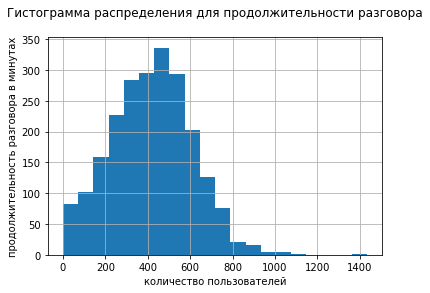

In [48]:
smart_call = smart['sum_duration'].hist(bins=20) # построение гистограммы
# добавляем подписи к осям и заголовка графика
smart_call.set_xlabel('количество пользователей')
smart_call.set_ylabel('продолжительность разговора в минутах')
smart_call.set_title('Гистограмма распределения для продолжительности разговора'+ "\n");

0.0      308
20.0      39
16.0      38
13.0      37
14.0      36
        ... 
112.0      1
117.0      1
110.0      1
129.0      1
121.0      1
Name: messages_sent_amount, Length: 124, dtype: int64

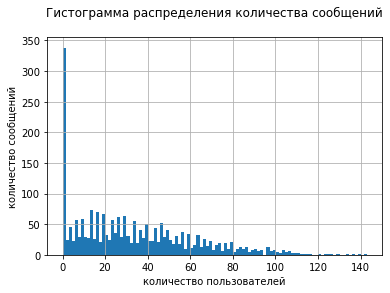

In [49]:
smart_sms = smart['messages_sent_amount'].hist(bins = 100) # построение гистограммы
# добавляем подписи к осям и заголовка графика
smart_sms.set_xlabel('количество пользователей')
smart_sms.set_ylabel('количество сообщений')
smart_sms.set_title('Гистограмма распределения количества сообщений'+ "\n");
smart['messages_sent_amount'].value_counts()

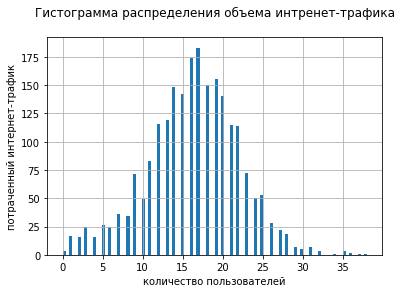

In [50]:
smart_gb = smart['gb_used'].hist(bins = 100); # построение гистограммы
# добавляем подписи к осям и заголовка графика
smart_gb.set_xlabel('количество пользователей')
smart_gb.set_ylabel('потраченный интернет-трафик')
smart_gb.set_title('Гистограмма распределения объема интренет-трафика'+ "\n");

По гистограммам можно описать распределения: количество пользователей с продолжительностью звонков распределено нормально,  количество пользователей с объемом интернет-трафика распределено нормально. Сложнее описать распределение количества пользователей с количеством сообщений, т.к. 308 пользователей не отправляют сообщений. Если удалить эти значения, то распределение станет похоже на нормальное со скашиванием, но это исказит результаты.

### Анализ тарифа «Ультра»

Выберим из таблицы только строки, где тариф «Ультра». Назовем такую таблицу `ultra` и выведим информацию о ней и первые 5 строк.

In [51]:
ultra = df[df['tariff_name'].isin(['ultra'])] # срез строк 
ultra.head()
ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 985
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                986 non-null    int64         
 1   month                  985 non-null    float64       
 2   mb_used                986 non-null    float64       
 3   gb_used                986 non-null    float64       
 4   messages_sent_amount   986 non-null    float64       
 5   sum_duration           986 non-null    float64       
 6   count_calls            986 non-null    float64       
 7   age                    986 non-null    int64         
 8   churn_date             77 non-null     datetime64[ns]
 9   city                   986 non-null    object        
 10  first_name             986 non-null    object        
 11  last_name              986 non-null    object        
 12  reg_date               986 non-null    datetime64[ns]
 13  tarif

Аналогично тарифу «Смарт» посчитаем среднее количество, дисперсию и стандартное отклонение для всех этих столбцов данных для тарифа «Ультра».

In [52]:
sum_duration_variance_ultra = np.var(ultra['sum_duration'], ddof = 1) # расчет дисперсии
sum_duration_standart_deviation_ultra = np.std(ultra['sum_duration'], ddof = 1) # расчет стандартного отклонения
sum_duration_mean_ultra = ultra['sum_duration'].mean() # расчет среднего
print(f' Cреднее количество минут разговора для тарифа «Смарт» {sum_duration_mean_ultra:.2f} \n Дисперсия {sum_duration_variance_ultra:.2f} \n Стандартное отклонение {sum_duration_standart_deviation_ultra:.2f}')

 Cреднее количество минут разговора для тарифа «Смарт» 526.09 
 Дисперсия 101052.49 
 Стандартное отклонение 317.89


In [53]:
messages_variance_ultra = np.var(ultra['messages_sent_amount'], ddof = 1) # расчет дисперсии
messages_standart_deviation_ultra = np.std(ultra['messages_sent_amount'], ddof = 1)  # расчет стандартного отклонения
messages_mean_ultra = ultra['messages_sent_amount'].mean() # расчет среднего
print(f' Cреднее количество сообщений для тарифа «Смарт» {messages_mean_ultra:.2f} \n Дисперсия {messages_variance_ultra:.2f} \n Стандартное отклонение {messages_standart_deviation_ultra:.2f}')

 Cреднее количество сообщений для тарифа «Смарт» 49.31 
 Дисперсия 2285.42 
 Стандартное отклонение 47.81


In [54]:
gb_used_variance_ultra = np.var(ultra['gb_used'], ddof = 1) # расчет дисперсии
gb_used_standart_deviation_ultra = np.std(ultra['gb_used'], ddof = 1)  # расчет стандартного отклонения
gb_used_mean_ultra = ultra['gb_used'].mean() # расчет среднего
print(f' Cредний объём интернет-трафика для тарифа «Смарт» {gb_used_mean_ultra:.2f} \n Дисперсия {gb_used_variance_ultra:.2f} \n Стандартное отклонение {gb_used_standart_deviation_ultra:.2f}')

 Cредний объём интернет-трафика для тарифа «Смарт» 19.47 
 Дисперсия 97.38 
 Стандартное отклонение 9.87


Построим гистограммы распределения для суммарной продолжительности разговора за месяц для кажого пользователя, количества сообщений, объёма интернет-трафика.

0.0       39
567.0      5
368.0      5
813.0      5
311.0      4
          ..
1410.0     1
1055.0     1
585.0      1
832.0      1
260.0      1
Name: sum_duration, Length: 641, dtype: int64

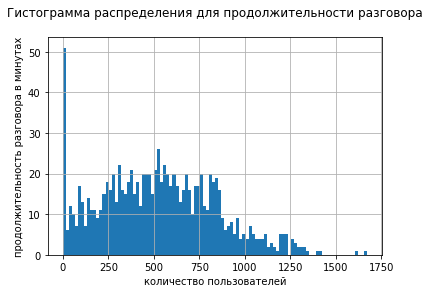

In [55]:
ultra_call = ultra['sum_duration'].hist(bins = 100); # построение гистограммы
# добавляем подписи к осям и заголовка графика
ultra_call.set_xlabel('количество пользователей')
ultra_call.set_ylabel('продолжительность разговора в минутах')
ultra_call.set_title('Гистограмма распределения для продолжительности разговора'+ "\n");
ultra['sum_duration'].value_counts()

0.0      191
6.0       13
20.0      13
40.0      13
3.0       12
        ... 
211.0      1
180.0      1
188.0      1
185.0      1
92.0       1
Name: messages_sent_amount, Length: 178, dtype: int64

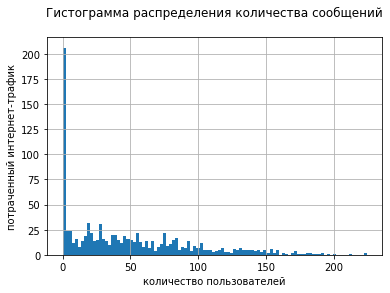

In [56]:
ultra_sms = ultra['messages_sent_amount'].hist(bins = 100); # построение гистограммы
# добавляем подписи к осям и заголовка графика
ultra_sms.set_xlabel('количество пользователей')
ultra_sms.set_ylabel('потраченный интернет-трафик')
ultra_sms.set_title('Гистограмма распределения количества сообщений'+ "\n");
ultra['messages_sent_amount'].value_counts()

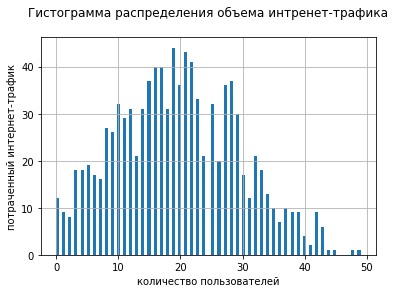

In [57]:
ultra_gb = ultra['gb_used'].hist(bins = 100); # построение гистограммы
# добавляем подписи к осям и заголовка графика
ultra_gb.set_xlabel('количество пользователей' )
ultra_gb.set_ylabel('потраченный интернет-трафик')
ultra_gb.set_title('Гистограмма распределения объема интренет-трафика' + "\n");

По гистограммам можно описать распределения: количество пользователей с объемом интернет-трафика распределено нормально.  Количество пользователей с продолжительностью звонков распределено нормально, но есть 39 пользователей с продолжительностью звонков 0. Эти звонки можно было бы удалить, но есть указание в самом проекте (В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять).   Сложнее описать распределение количества пользователей с количеством сообщений, т.к. 191 пользователь не отправляют сообщений. Если удалить эти значения, то распределение станет похоже на нормальное со скашиванием, но это исказит результаты.

Создадим общую таблицу по ключевым параметрам для обоих тарифов

In [58]:
(
    df
        .pivot_table(index = 'tariff_name', values = ['gb_used', 'messages_sent_amount',
       'sum_duration', 'profit'], aggfunc = ['mean', 'median', 'std', 'var'])
        .round()
        .transpose()
)

tariff_name                     smart     ultra
mean   gb_used                   16.0      19.0
       messages_sent_amount      33.0      49.0
       profit                  1290.0    2070.0
       sum_duration             418.0     526.0
median gb_used                   17.0      19.0
       messages_sent_amount      28.0      38.0
       profit                  1021.0    1950.0
       sum_duration             422.0     518.0
std    gb_used                    6.0      10.0
       messages_sent_amount      28.0      48.0
       profit                   818.0     376.0
       sum_duration             190.0     318.0
var    gb_used                   33.0      97.0
       messages_sent_amount     797.0    2285.0
       profit                669731.0  141388.0
       sum_duration           36281.0  101052.0

Для наглядности построим диаграммы размаха для обоих тарифов

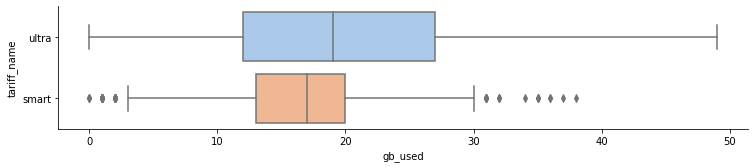

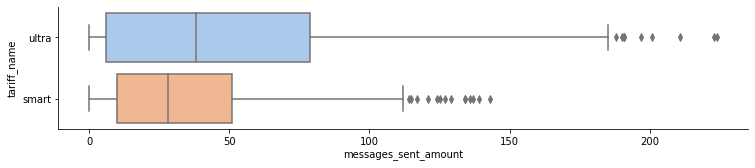

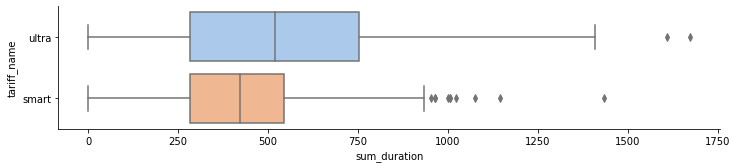

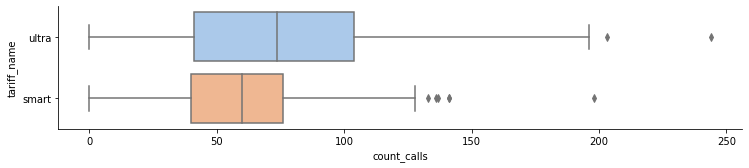

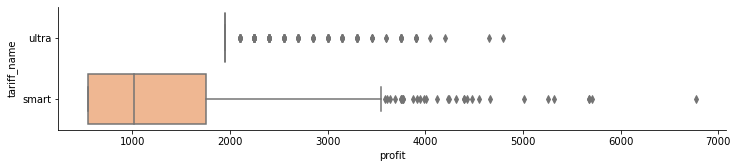

In [59]:
for column in ['gb_used', 'messages_sent_amount',
       'sum_duration', 'count_calls', 'profit']:    
    g = sns.catplot(y='tariff_name', x=column, kind="box", data=df, orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)

Сделаем расчеты для общего вывода. Построим графики изменения ключевых метрик за год

In [60]:
smart_profit = smart['profit'].sum()
ultra_profit = ultra['profit'].sum()
sum_profit = df['profit'].sum()
sum_profit_per_person = df['profit'].mean()
smart_profit_per_person = smart['profit'].mean()
ultra_profit_per_person = ultra['profit'].mean()
print(f' Общая выручка {sum_profit:.2f} \n Выручка от пользоватилей тарифа «Смарт» {smart_profit:.2f} \n Выручка от пользоватилей тарифа «Ультра» {ultra_profit:.2f}')
print(f' Средняя выручка от 1 пользователя {sum_profit_per_person:.2f} \n Средняя выручка от 1 пользователя тарифа «Смарт» {smart_profit_per_person:.2f} \n Средняя выручка от 1 пользователя тарифа «Ультра» {ultra_profit_per_person:.2f}')

 Общая выручка 4916951.00 
 Выручка от пользоватилей тарифа «Смарт» 2875901.00 
 Выручка от пользоватилей тарифа «Ультра» 2041050.00
 Средняя выручка от 1 пользователя 1528.90 
 Средняя выручка от 1 пользователя тарифа «Смарт» 1289.64 
 Средняя выручка от 1 пользователя тарифа «Ультра» 2070.03


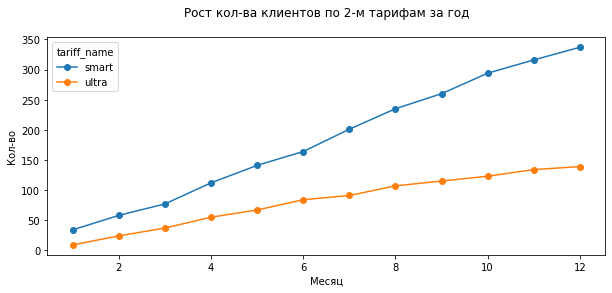

In [61]:
(df
 .pivot_table(index='tariff_name', columns='month', values='user_id', aggfunc='count')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Рост кол-ва клиентов по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Кол-во');

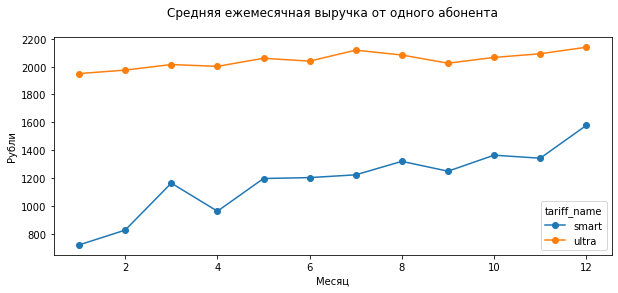

In [62]:
(df
 .pivot_table(index='tariff_name', columns='month', values='profit', aggfunc='mean')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Средняя ежемесячная выручка от одного абонента'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

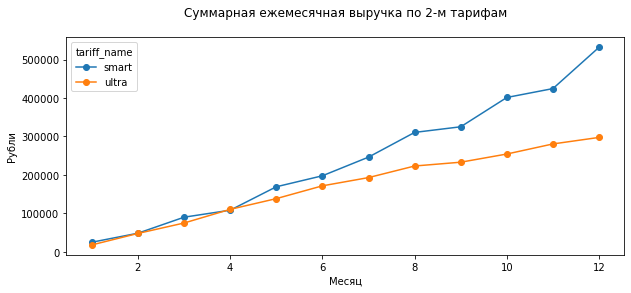

In [63]:
(df
 .pivot_table(index='tariff_name', columns='month', values='profit', aggfunc='sum')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Суммарная ежемесячная выручка по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

### Вывод

Мы провели анализ данных по тарифам «Смарт» и «Ультра». Гистограммы распределения у обоих тарифов имеют похожий вид. Значения среднего, дисперсии, стандартного отклонения у тарифа «Ультра» превышают значения у тарифа «Смарт» для выбранных категорий данных. Это объясняется тем, что пользователи заранее выбирают необходимый тариф с включенным пакетом услуг, исходя из своих нужд, и тратят больше минут, сообшений и интернета.

## Проверка гипотез и пояснения

### Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Нулевую гипотезу примем, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна. Тогда альтернативная ей будет: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. В качестве критерия для проверки выберим гипотезу о равенстве средних двух генеральных совокупностей. Т.к. количество элементов в двух совокупностях различно и нет уверенности в равенстве дисперсий, то параметр примем: `equal_var = False`. Уровень значимости `alpha` зададим 5%.

In [64]:
# проверка гипотезы

alpha = 0.05

results = st.ttest_ind(smart['profit'], ultra['profit'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


### Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевую гипотезу примем, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Тогда альтернативная ей будет: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. В качестве критерия для проверки выберим гипотезу о равенстве средних двух генеральных совокупностей. Т.к. количество элементов в двух совокупностях различно и нет уверенности в равенстве дисперсий, то параметр примем: `equal_var = False`. Уровень значимости `alpha` зададим 5%. Выберим срез строк для Москвы и других регионов.

In [65]:
moscow = df[df['city'].isin(['Москва'])] # срез строк 
moscow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 8 to 3179
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                611 non-null    int64         
 1   month                  611 non-null    float64       
 2   mb_used                611 non-null    float64       
 3   gb_used                611 non-null    float64       
 4   messages_sent_amount   611 non-null    float64       
 5   sum_duration           611 non-null    float64       
 6   count_calls            611 non-null    float64       
 7   age                    611 non-null    int64         
 8   churn_date             41 non-null     datetime64[ns]
 9   city                   611 non-null    object        
 10  first_name             611 non-null    object        
 11  last_name              611 non-null    object        
 12  reg_date               611 non-null    datetime64[ns]
 13  tari

In [66]:
other_regions = df[df['city'] != 'Москва'] # срез строк 
other_regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2605 entries, 0 to 3215
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2605 non-null   int64         
 1   month                  2603 non-null   float64       
 2   mb_used                2605 non-null   float64       
 3   gb_used                2605 non-null   float64       
 4   messages_sent_amount   2605 non-null   float64       
 5   sum_duration           2605 non-null   float64       
 6   count_calls            2605 non-null   float64       
 7   age                    2605 non-null   int64         
 8   churn_date             148 non-null    datetime64[ns]
 9   city                   2605 non-null   object        
 10  first_name             2605 non-null   object        
 11  last_name              2605 non-null   object        
 12  reg_date               2605 non-null   datetime64[ns]
 13  tar

In [67]:
# проверка гипотезы

alpha = 0.05

results = st.ttest_ind(moscow['profit'], other_regions['profit'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


p-значение равно 0.5216952110000278. Это означает, что вероятность получить наблюдаемый или еще более далекий от предполагаемого результат (средняя выручка пользователей из Москвы равна выручке пользователей из других регионов) при условии, что нулевая гипотеза верна, равна 52%. А эта вероятность намного выше, чем 5% (уровень значимости).

### Вывод

Необходимо было проверить следующие гипотезы : средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

В первом анализе выбрали нулевую гипотезу о равенстве выручек, p-value оказался меньше выбранного уровня значимости, значит гипотезу о равенстве отвергаем, т.е. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Во втором анализе выбрали нулевую гипотезу о равенстве выручек, p-value оказался больше выбранного уровня значимости, значит не получилось отвергнуть нулевую гипотезу, т.е. средняя выручка пользователей из Москвы может не отличаться от выручки пользователей из других регионов.

## Общий вывод

В ходе исследования необходимо проанализировать тарифы «Смарт» и «Ультра» федерального оператора сотовой связи - компании «Мегалайн».

1. В данных было найдено небольшое количество пропусков и аномалий, часть из которых были устранены. Пропуски в столбцах, которые не влияют на ход исследования, были оставлены.
2. В данные были внесены дополнительные столбцы для более глубокого анализа, в частности столбец с выручкой.
3. В ходе исследования было установлено:     
* характерные параметры для тарифа «Ультра» выше, чем у тарифа «Смарт», т.е. пользователи первого тарифа больше используют звонки, сообщения и интернет-трафик,
* количество отправленных сообщений невысокое, а более 500 ими не пользуются вообще, 
* гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются была подтверждена,
* гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов не была подтверждена.

Ответим на вопросы: какой тариф приносит больше денег и какой тариф лучше.

Общая выручка от двух тарифов составила 4 916 951 руб. Из них на долю пользователей тарифа «Смарт» пришлось 2 875 901 руб., а на пользователей тарифа «Ультра» - 2 041 050 руб. С точки зрения совокупной прибыли тариф «Смарт» прибыльнее. Но если посмотреть на среднюю прибыль на одного пользователя, то получается, что у тарифа «Ультра» она выше (2070 руб. против 1289 руб.). Такие результаты объясняются тем, что у тарифа «Ультра» 986 пользователей, а у «Смарт» 2230. Т.е. необходимо привлекать клиентов для пользования тарифом «Ультра».